<a href="https://colab.research.google.com/github/alfonso-uacj/ColabFiles/blob/main/Pr%C3%A1ctica_20_Ejercicios_con_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Realizar un EDA completo, incluyendo:**

-Descripción de los datos (medias, medianas, desviaciones estándar, etc.).

-Histogramas para las columnas numéricas.

-De la columna Time obten el día de la Semana y realiza una gráfica de barras.

-Boxplots para identificar outliers en las columnas numéricas.

-Matriz de correlación y mapa de calor.

-Pairplot para visualizar relaciones entre variables numéricas.

-Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

# Descripción de los datos (medias, medianas, desviaciones estándar, etc.).

In [8]:
import pandas as pd

# Archivo
file = '/content/drive/MyDrive/ClassFiles/AirQuality.csv'

########### MEDIA #################################
# Se encontro esta funcion para delimitar correctamente los datos originales
df = pd.read_csv(file, delimiter=';', decimal=',', skipinitialspace=True)

#  media con columnas numéricas
valmedia = df.select_dtypes(include='number').mean()

# Mostrar las medias
print("MEDIA\n")
print(valmedia)

############### MEDIANA ################################
valmediana = df.select_dtypes(include='number').median()
print("\nMEDIANA\n")
print(valmediana)


###############DEVIACION ESTANDAR#####################

valestandar = df.select_dtypes(include='number').std()
print("\nDesviacion estandar\n")
print(valestandar)



MEDIA

CO(GT)            -34.207524
PT08.S1(CO)      1048.990061
NMHC(GT)         -159.090093
C6H6(GT)            1.865683
PT08.S2(NMHC)     894.595276
NOx(GT)           168.616971
PT08.S3(NOx)      794.990168
NO2(GT)            58.148873
PT08.S4(NO2)     1391.479641
PT08.S5(O3)       975.072032
T                   9.778305
RH                 39.485380
AH                 -6.837604
Unnamed: 15              NaN
Unnamed: 16              NaN
dtype: float64

MEDIANA

CO(GT)              1.5000
PT08.S1(CO)      1053.0000
NMHC(GT)         -200.0000
C6H6(GT)            7.9000
PT08.S2(NMHC)     895.0000
NOx(GT)           141.0000
PT08.S3(NOx)      794.0000
NO2(GT)            96.0000
PT08.S4(NO2)     1446.0000
PT08.S5(O3)       942.0000
T                  17.2000
RH                 48.6000
AH                  0.9768
Unnamed: 15            NaN
Unnamed: 16            NaN
dtype: float64

Desviacion estandar

CO(GT)            77.657170
PT08.S1(CO)      329.832710
NMHC(GT)         139.789093
C6H6(GT

# Histogramas para las columnas numéricas.

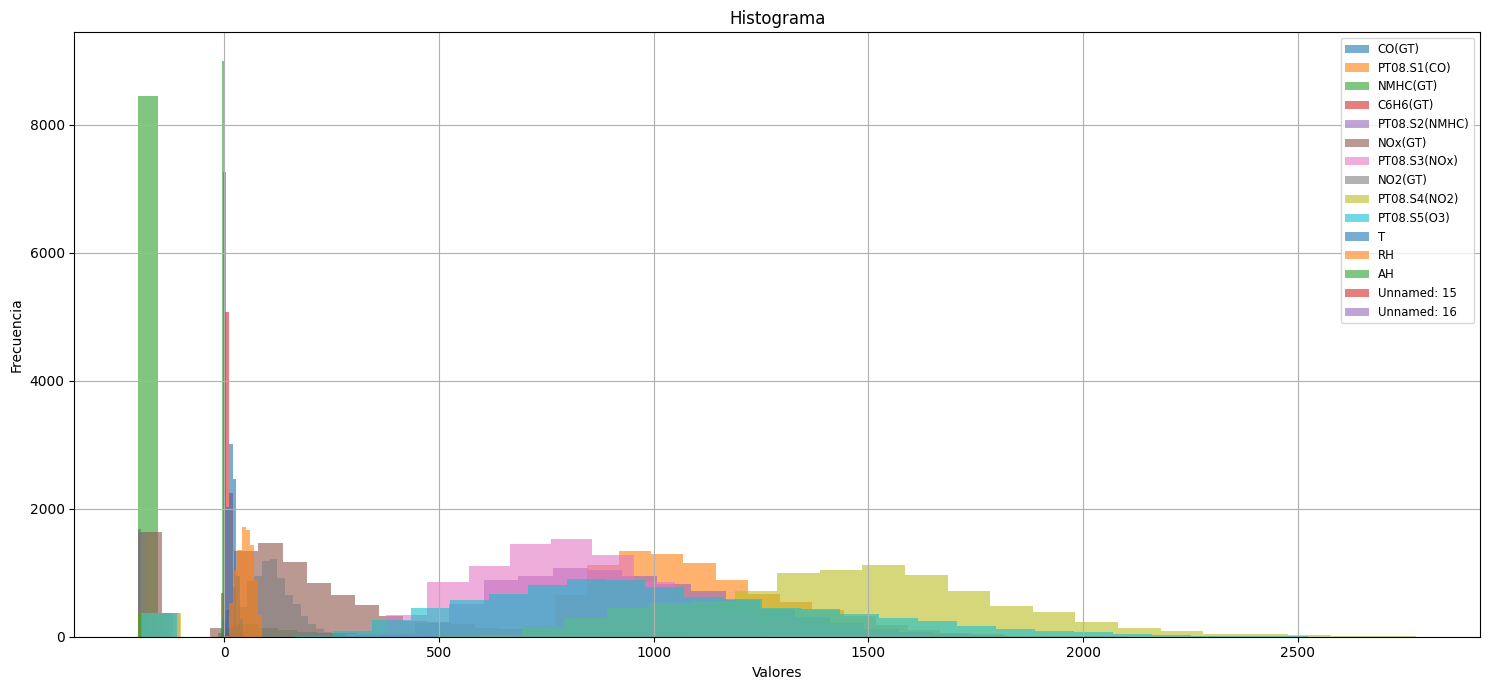

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# archivo
file =  '/content/drive/MyDrive/ClassFiles/AirQuality.csv'

# Se encontro esta funcion para delimitar correctamente los datos originales
df = pd.read_csv(file, delimiter=';', decimal=',', skipinitialspace=True)

# columnas num
cols = df.select_dtypes(include='number')

# histograma
plt.figure(figsize=(15, 7))
for column in cols.columns:
    plt.hist(cols[column].dropna(), bins=30, alpha=0.6, label=column)

plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# De la columna Time obten el día de la Semana y realiza una gráfica de barra


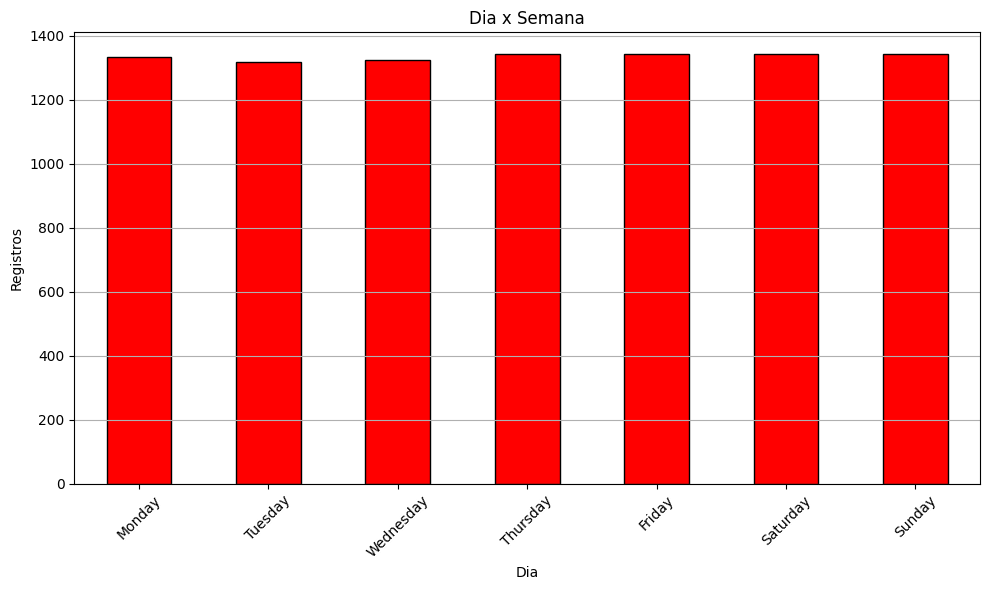

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# archivo
file =  '/content/drive/MyDrive/ClassFiles/AirQuality.csv'

# Se encontro esta funcion para delimitar correctamente los datos originales
df = pd.read_csv(file, delimiter=';', decimal=',', skipinitialspace=True)

#  solo un datetime uniendo columnas Date y Time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Nombre dia de la semana
df['dia-semana'] = df['Datetime'].dt.day_name()

# REgistro por semana
dias = df['dia-semana'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Grafica
plt.figure(figsize=(10, 6))
dias.plot(kind='bar', color='red', edgecolor='black')
plt.title('Dia x Semana')
plt.xlabel('Dia')
plt.ylabel('Registros')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Boxplots para identificar outliers en las columnas numéricas.

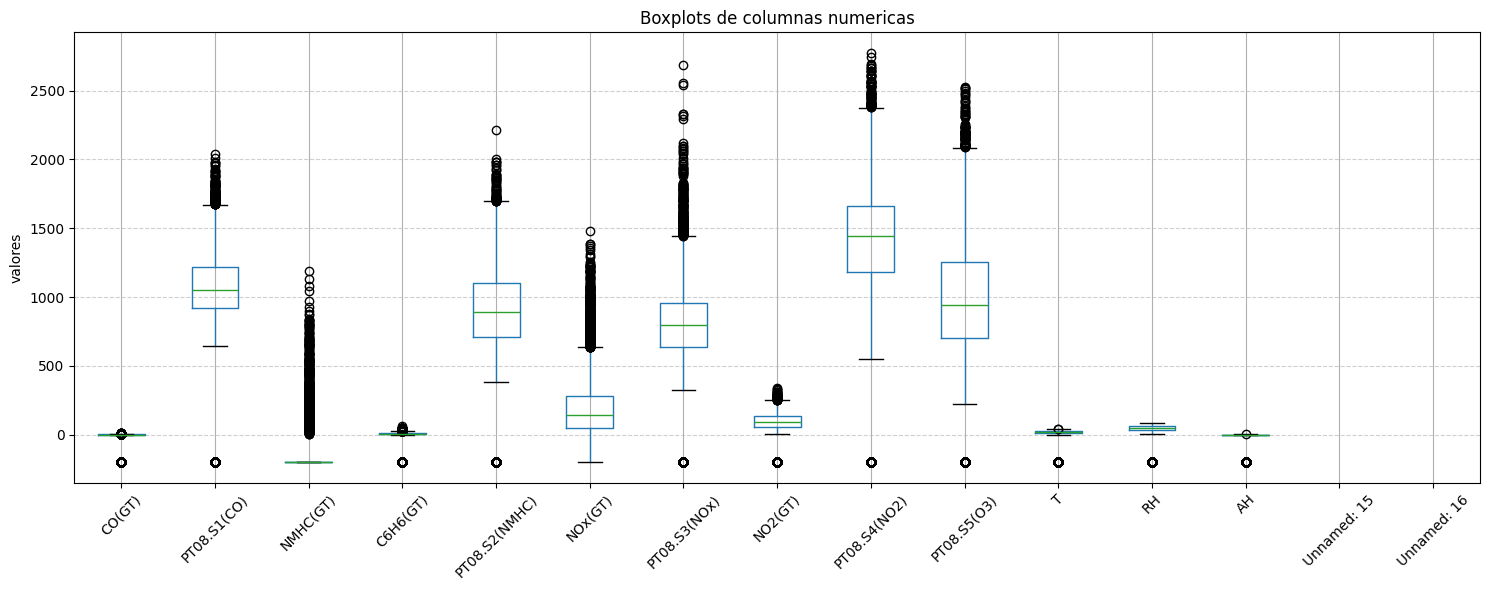

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# archivo
file =  '/content/drive/MyDrive/ClassFiles/AirQuality.csv'

# Se encontro esta funcion para delimitar correctamente los datos originales
df = pd.read_csv(file, delimiter=';', decimal=',', skipinitialspace=True)

# Seleccionar solo columnas numéricas
col = df.select_dtypes(include='number')

# boxplots
plt.figure(figsize=(15, 6))
col.boxplot(rot=90)
plt.title('Boxplots de columnas numericas')
plt.ylabel('valores')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Matriz de correlación y mapa de calor.

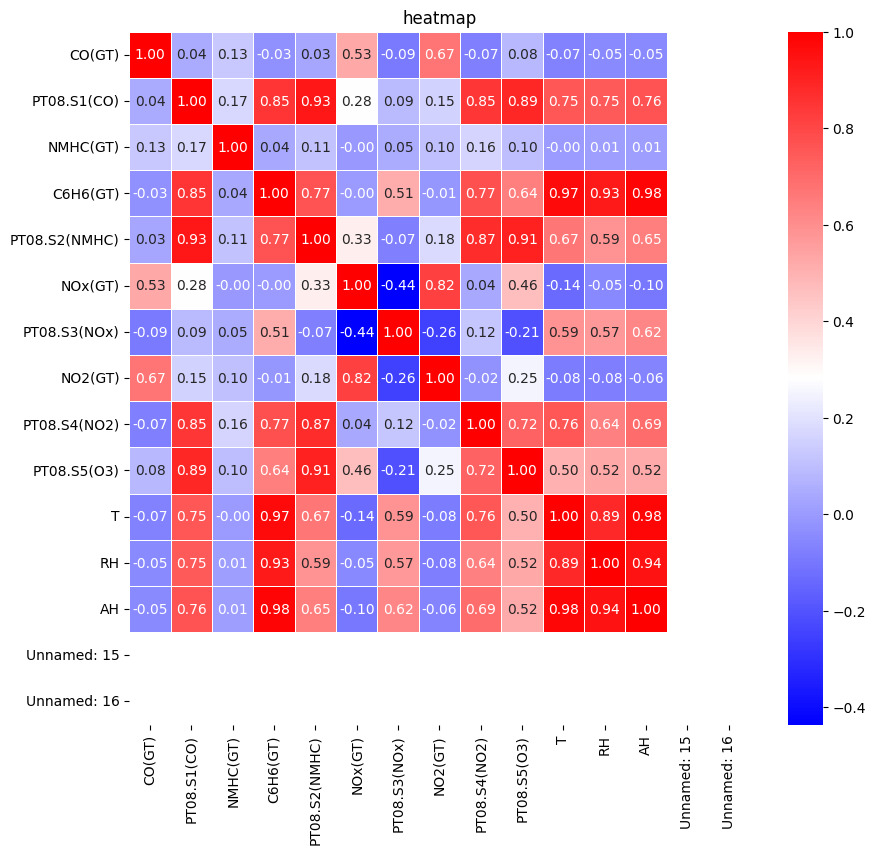

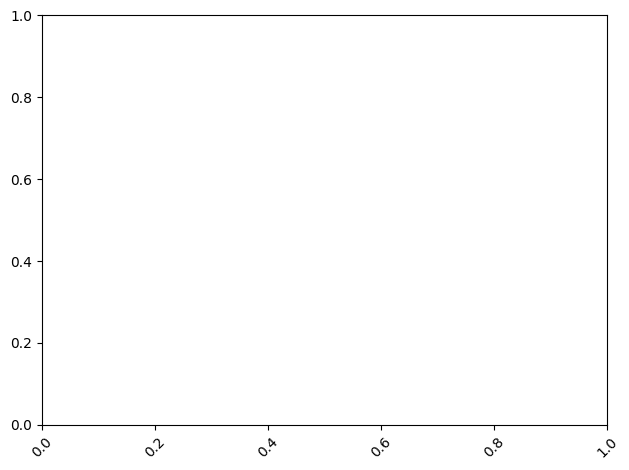

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# archivo
file =  '/content/drive/MyDrive/ClassFiles/AirQuality.csv'

# Se encontro esta funcion para delimitar correctamente los datos originales
df = pd.read_csv(file, delimiter=';', decimal=',', skipinitialspace=True)


# Seleccionar solo columnas numéricas
col = df.select_dtypes(include='number')

#  matriz de correlación
mat = col.corr()

# mapa de calor
plt.figure(figsize=(10, 9))
sns.heatmap(mat, annot=True, fmt=".2f", cmap="bwr", linewidths=0.5)
plt.title('heatmap')
plt.show()
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Pairplot para visualizar relaciones entre variables numéricas

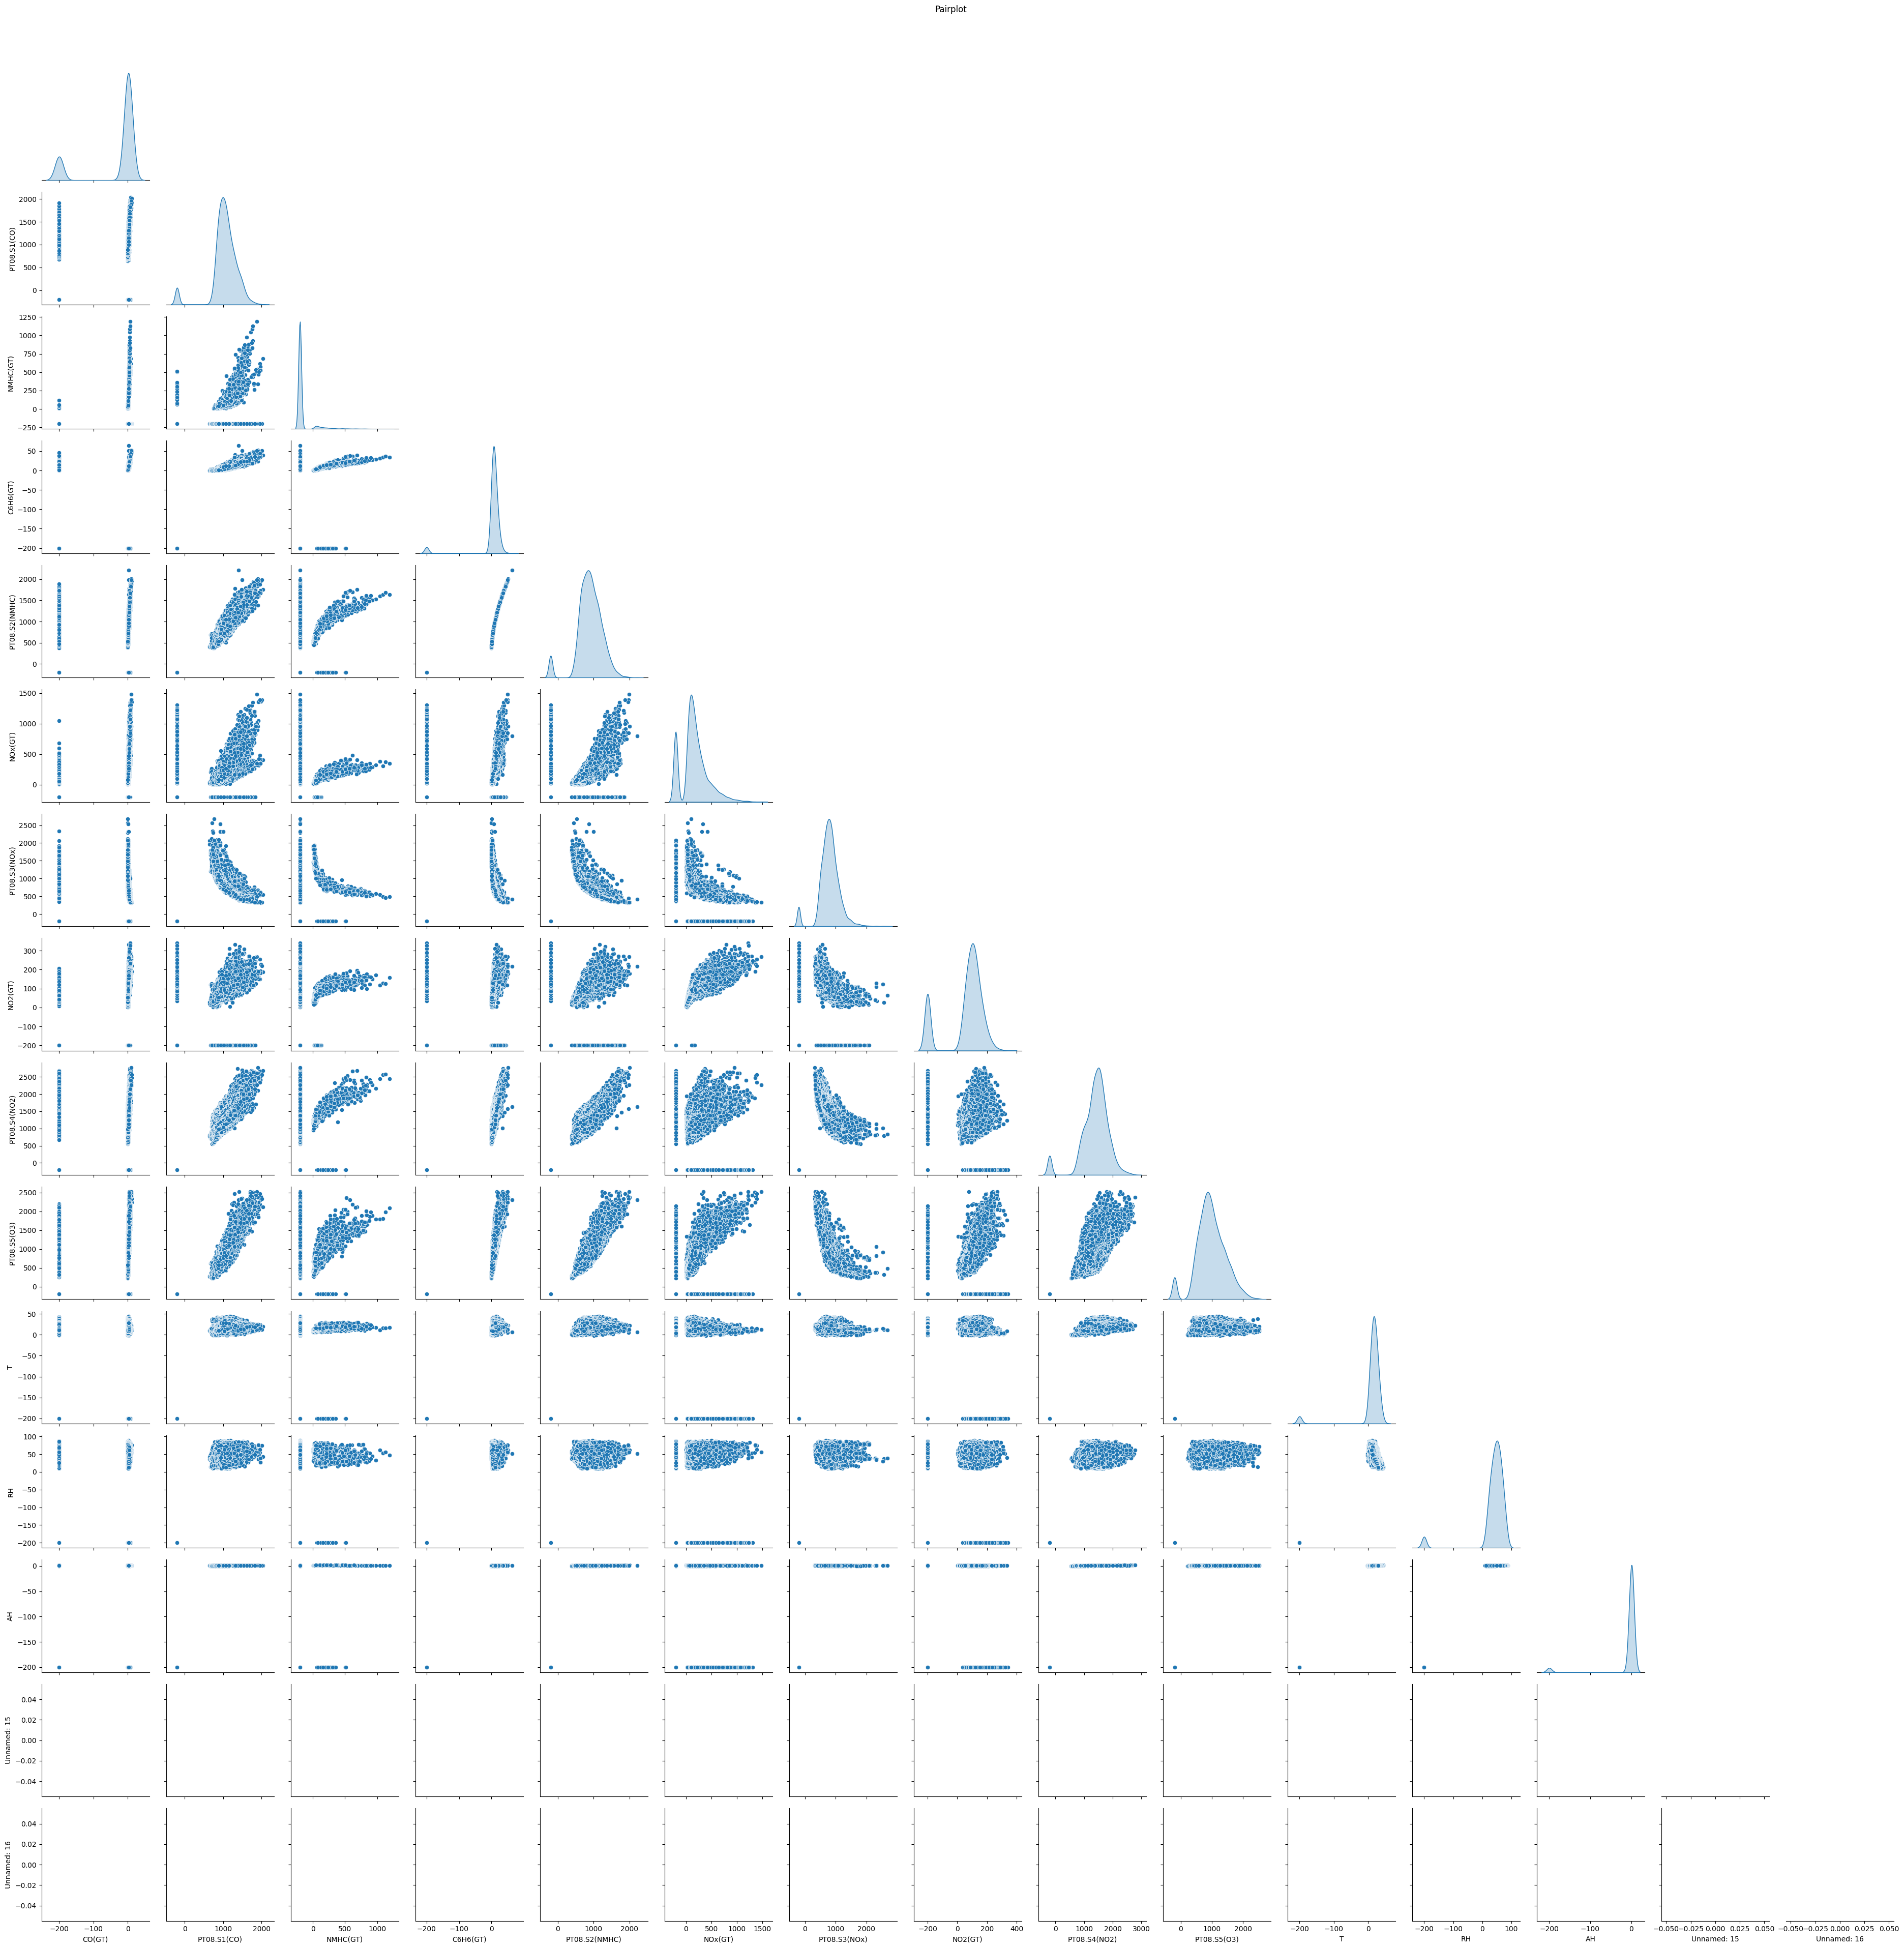

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# archivo
file =  '/content/drive/MyDrive/ClassFiles/AirQuality.csv'

# Se encontro esta funcion para delimitar correctamente los datos originales
df = pd.read_csv(file, delimiter=';', decimal=',', skipinitialspace=True)

# numerico
col = df.select_dtypes(include='number')

# Pairplot
sns.pairplot(col, diag_kind='kde', corner=True)
plt.suptitle('Pairplot', y=1.02)
plt.tight_layout()
plt.show()

# Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

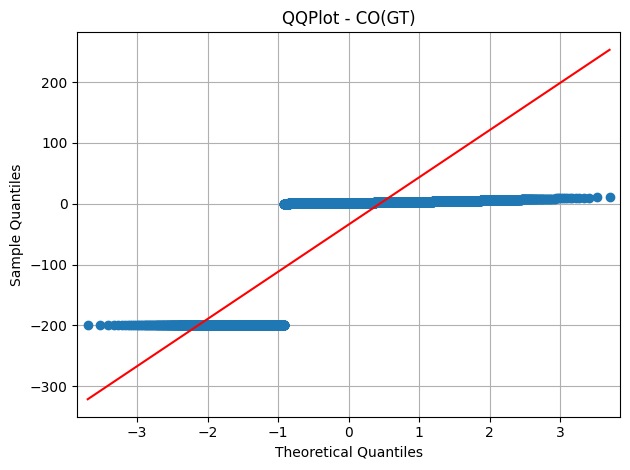

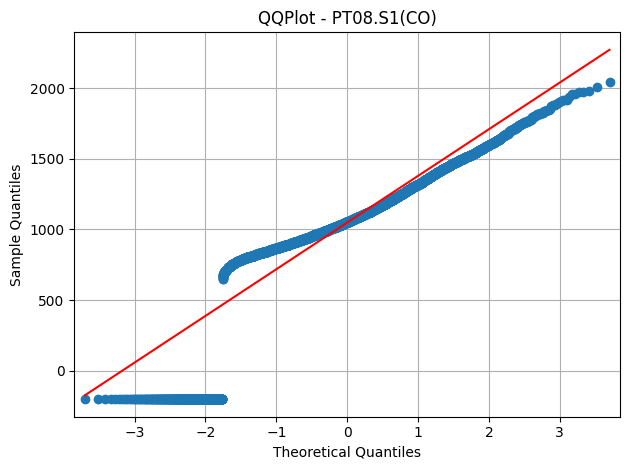

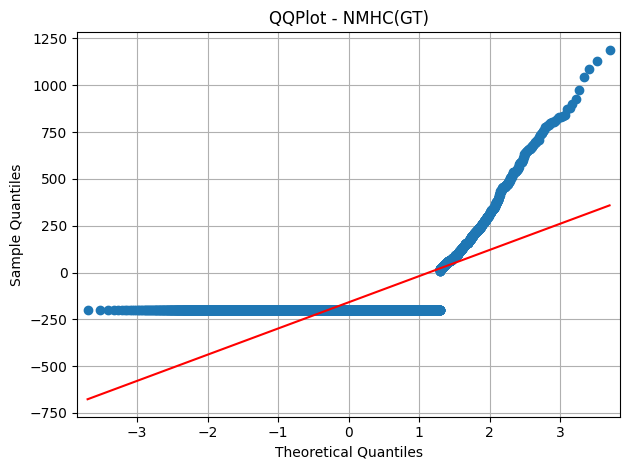

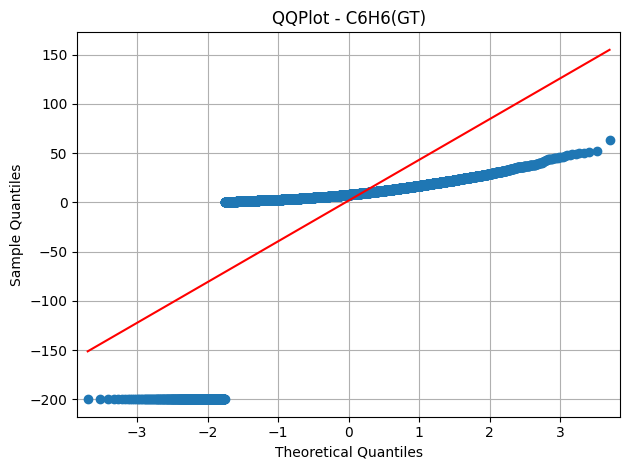

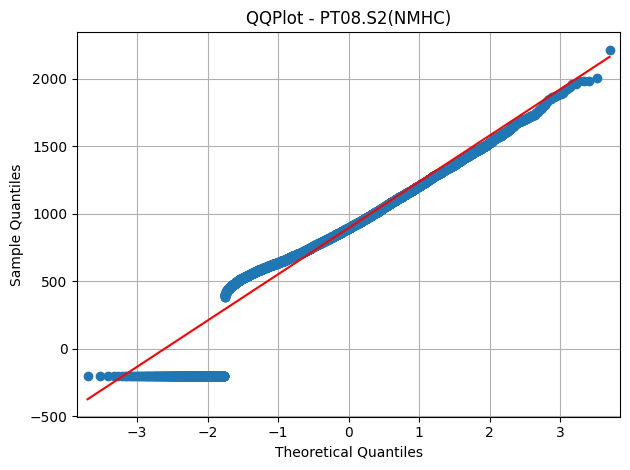

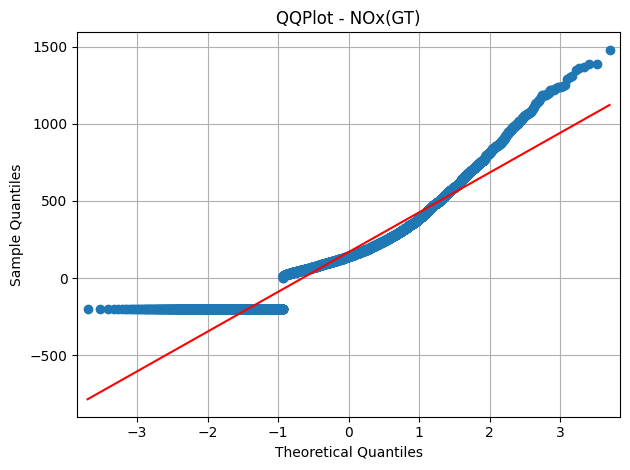

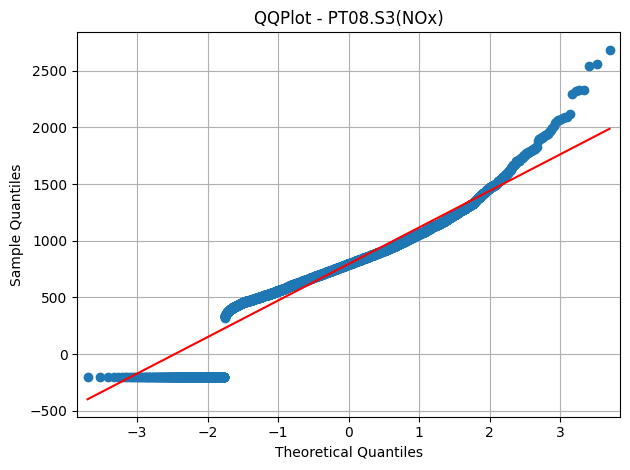

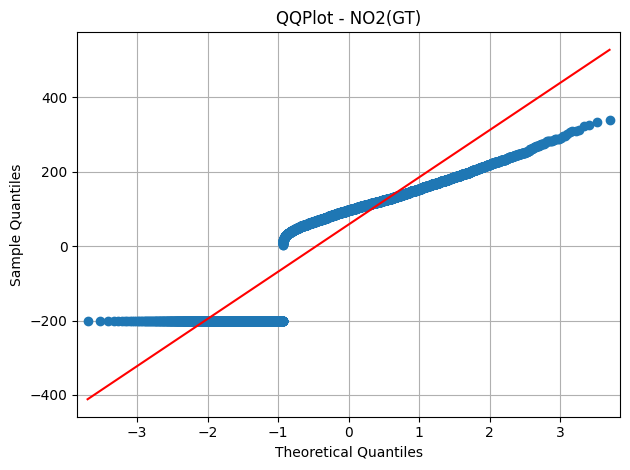

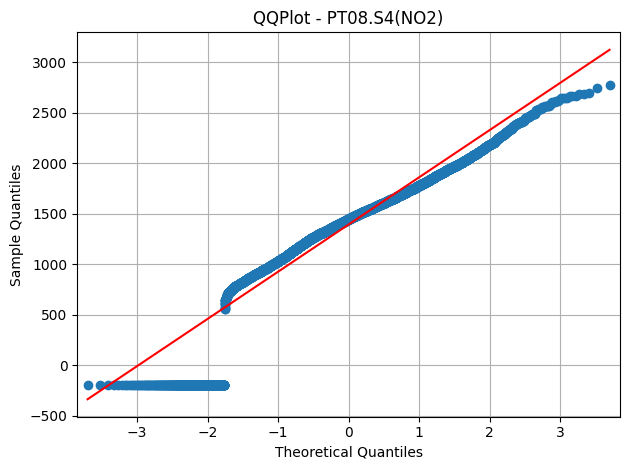

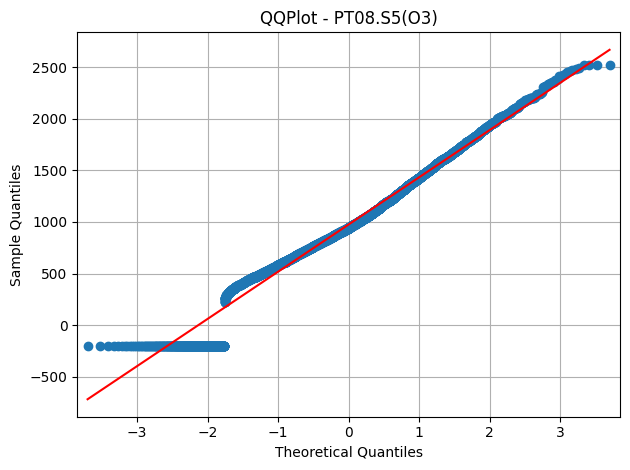

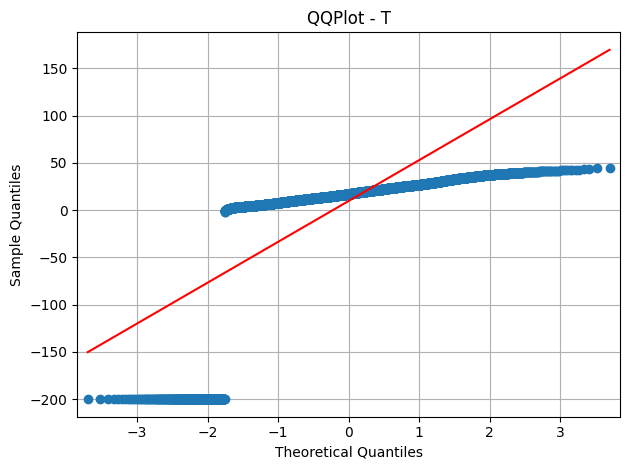

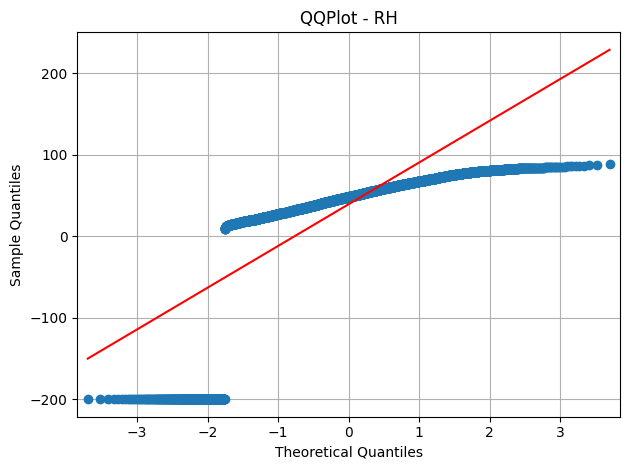

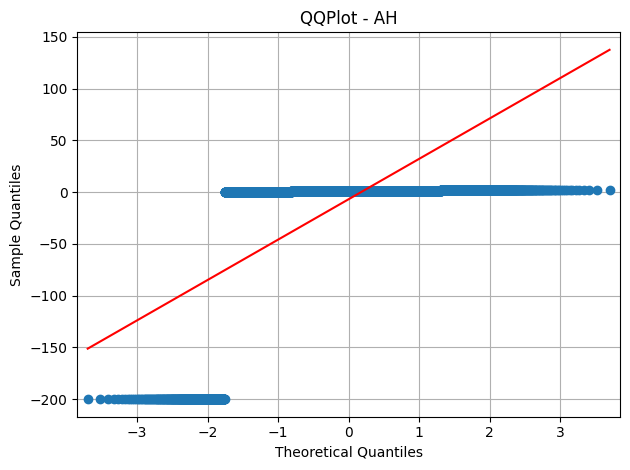

In [39]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# archivo
file =  '/content/drive/MyDrive/ClassFiles/AirQuality.csv'

# Se encontro esta funcion para delimitar correctamente los datos originales
df = pd.read_csv(file, delimiter=';', decimal=',', skipinitialspace=True)

# Limpiar datos primeramente paara generar la grafica y no tener errores o vacios
df_cleaned = df.drop(columns=["Unnamed: 15", "Unnamed: 16"], errors='ignore')
numeric_cols = df_cleaned.select_dtypes(include='number')
colfilt = numeric_cols.loc[:, (numeric_cols.count() >= 5) & (numeric_cols.nunique() > 1)]
cleaneddatause = colfilt.dropna()

for col in cleaneddatause.columns:
    data = cleaneddatause[col]

    # QQPlot
    try:
        sm.qqplot(data, line='s')
        plt.title(f"QQPlot - {col}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except:
        pass

